In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from matplotlib.pyplot import figure

In [52]:
dataset=pd.read_csv("./ap.csv",index_col="Date",parse_dates=True)

In [53]:
dataset.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-07-21  145.529999  146.130005  144.630005  145.399994  145.399994   
2021-07-22  145.940002  148.199997  145.809998  146.800003  146.800003   
2021-07-23  147.550003  148.720001  146.919998  148.559998  148.559998   
2021-07-26  148.270004  149.830002  147.699997  148.990005  148.990005   
2021-07-27  149.119995  149.210007  145.550003  146.770004  146.770004   

               Volume  
Date                   
2021-07-21   74993500  
2021-07-22   77338200  
2021-07-23   71361600  
2021-07-26   72269700  
2021-07-27  103580300

In [54]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2407 entries, 2012-01-03 to 2021-07-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2407 non-null   float64
 1   High       2407 non-null   float64
 2   Low        2407 non-null   float64
 3   Close      2407 non-null   float64
 4   Adj Close  2407 non-null   float64
 5   Volume     2407 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 131.6 KB


<AxesSubplot:xlabel='Date'>

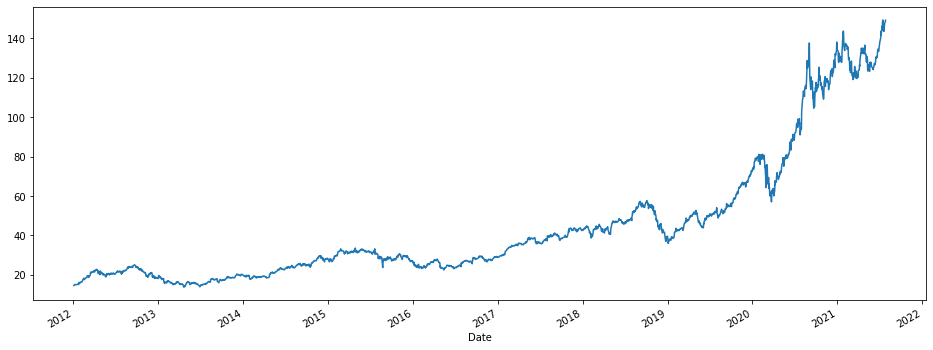

In [56]:
dataset["Open"].plot(figsize=(16,6))

In [57]:
dataset["Volume"]=dataset["Volume"].astype(float)

In [58]:
dataset.rolling(7).mean().head(20)

Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2012-01-03        NaN        NaN        NaN        NaN        NaN          NaN
2012-01-04        NaN        NaN        NaN        NaN        NaN          NaN
2012-01-05        NaN        NaN        NaN        NaN        NaN          NaN
2012-01-06        NaN        NaN        NaN        NaN        NaN          NaN
2012-01-09        NaN        NaN        NaN        NaN        NaN          NaN
2012-01-10        NaN        NaN        NaN        NaN        NaN          NaN
2012-01-11  14.939847  15.025918  14.858826  14.962347  12.866165  288444400.0
2012-01-12  15.005561  15.078979  14.908571  15.014183  12.910739  275639600.0
2012-01-13  15.055051  15.108418  14.956428  15.046683  12.938686  270782400.0
2012-01-17  15.102245  15.146378  15.008928  15.080714  12.967949  266729200.0
2012-01-18  15.138929  15.180663  15.045051  15.114949  12.997387  260800400.0
2012-01-19  15.162653  15.199133  15.071377  15.145663  13.023799  241902400.0
2012-01-20  15.170714  15.206785  15.062449  15.130663  13.010900  264156400.0
2012-01-23  15.170663  15.235357  15.077704  15.155459  13.032222  277153200.0
2012-01-24  15.185051  15.246582  15.081786  15.150459  13.027922  325017600.0
2012-01-25  15.362296  15.420051  15.209694  15.287449  13.145721  429630800.0
2012-01-26  15.485561  15.536377  15.312653  15.389133  13.233159  441214800.0
2012-01-27  15.574235  15.633367  15.401786  15.481837  13.312875  444488800.0
2012-01-30  15.653622  15.748316  15.498112  15.610714  13.423697  461289200.0
2012-01-31  15.796990  15.905153  15.668112  15.795306  13.582428  458104800.0

<AxesSubplot:xlabel='Date'>

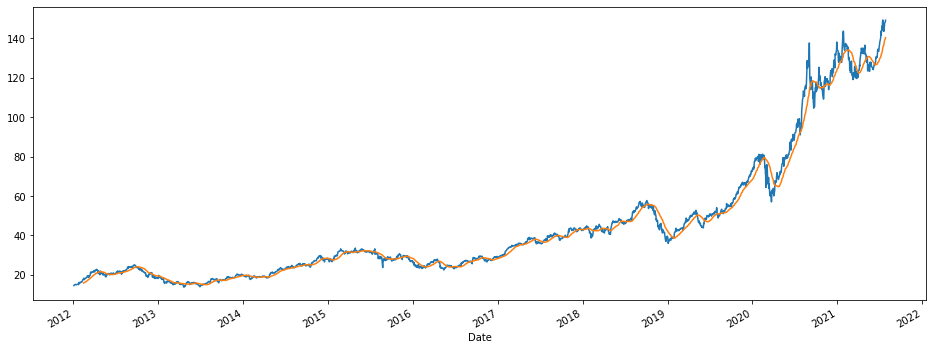

In [59]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

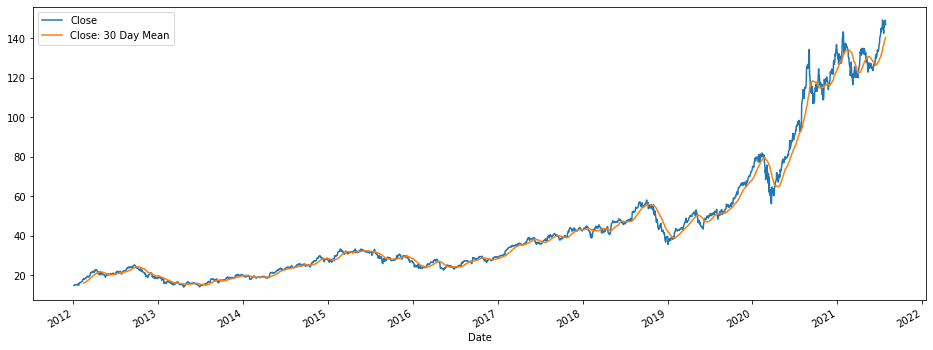

In [60]:
dataset['Close: 30 Day Mean']=dataset["Close"].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

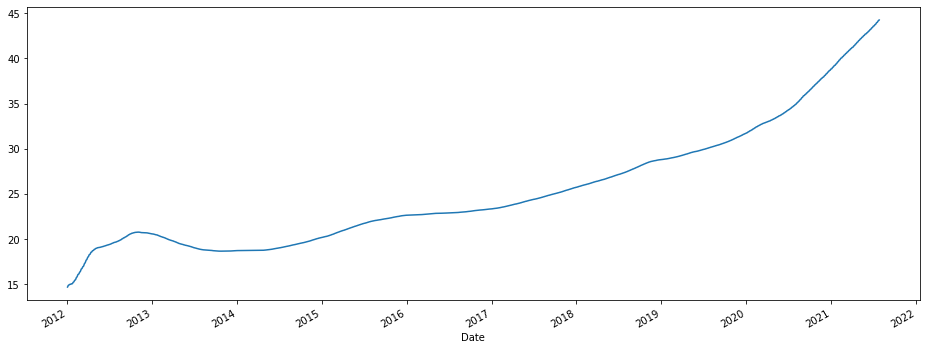

In [61]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [62]:
train=dataset['Open']
train=pd.DataFrame(train)

In [63]:
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Adj Close             False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [64]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train)

In [65]:
x_train=[]
y_train=[]
for i in range(60,len(train)):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [66]:
#2nd Part
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [67]:
#regressor
r=Sequential()

In [68]:
r.add(LSTM(units=50,return_sequences=True, input_shape = (x_train.shape[1],1)))

r.add(LSTM(units=50))

r.add(Dense(units=1))

In [69]:
r.compile(optimizer='adam', loss= 'mean_squared_error')

r.fit(x_train,y_train,epochs=1,batch_size=1, verbose=2)

2347/2347 - 37s - loss: 0.0010


In [70]:
test=pd.read_csv('./ap20-21.csv',index_col="Date",parse_dates=True)

In [71]:
real_stock=test.iloc[:,1:2].values

In [72]:
test.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-07-27   93.709999   94.904999   93.480003   94.809998   94.175430   
2020-07-28   94.367500   94.550003   93.247498   93.252502   92.628365   
2020-07-29   93.750000   95.230003   93.712502   95.040001   94.403893   
2020-07-30   94.187500   96.297501   93.767502   96.190002   95.546204   
2020-07-31  102.885002  106.415001  100.824997  106.260002  105.548805   

               Volume  
Date                   
2020-07-27  121214000  
2020-07-28  103625600  
2020-07-29   90329200  
2020-07-30  158130000  
2020-07-31  374336800

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-07-27 to 2021-07-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [74]:
test["Volume"]=test["Volume"].astype(float)

In [75]:
test_set=test['Open']
test_set=pd.DataFrame(test_set)

In [76]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-07-27 to 2021-07-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [77]:
dataset_total=pd.concat((dataset['Open'],test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]

for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=r.predict(x_test)
predicted_stock=sc.inverse_transform(predicted_stock)


In [78]:
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       253 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


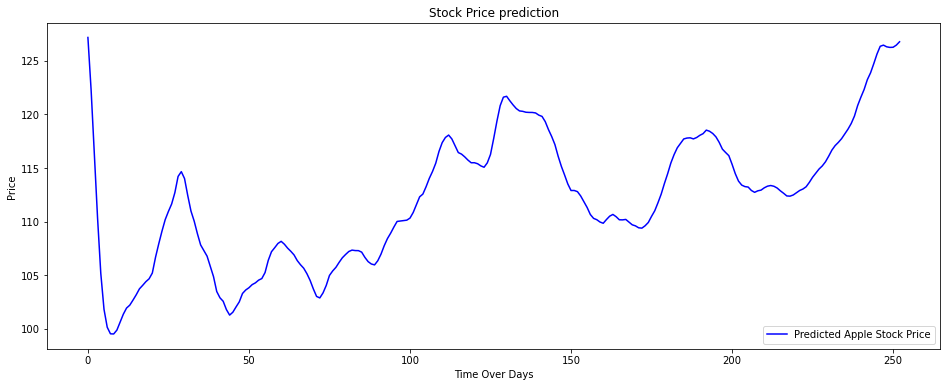

In [79]:
plt.figure(figsize=(16,6))
#plt.plot(real_stock,color='red', label='Real Apple Stock price')
plt.plot(predicted_stock,color='blue', label="Predicted Apple Stock Price")
plt.title("Stock Price prediction")

plt.xlabel('Time Over Days')
plt.ylabel('Price')
plt.legend()
plt.show()